In [6]:
import numpy as np
import re
import matplotlib.pyplot as plt
import logging
%matplotlib inline

In [2]:
def parse_uncertainty(value_with_uncertainty: str) -> tuple[float, float]:
    """
    Parses a string representing a float with uncertainty in the format
    `value(uncertainty)`

    Args:
        value_with_uncertainty (str): A string containing a value with
            uncertainty, e.g., '1.1(2)'.

    Returns:
        tuple[float, float]:
            - The numerical value as a float.
            - The uncertainty as a float.

    Raises:
        ValueError: If the input string is not in the correct format.

    Example:
        >>> parse_uncertainty("1.1(2)")
        (1.1, 0.2)
    """
    check = re.fullmatch(r"(-?[\d.]+)\((\d+)\)", value_with_uncertainty)
    if not check:
        raise ValueError("Input must be in the format 'value(uncertainty)', e.g. 1.1(2)")

    value = float(check.group(1))
    uncertainty_digits = check.group(2)
    uncertainty = float(uncertainty_digits) * 10**(-len(check.group(1).split('.')[-1]))
    return value, uncertainty

assert parse_uncertainty("1.1(2)") == (1.1, 0.2)

In [3]:
def load_data_with_uncertainties(file_path: str, uncertainty_cols: list[int]) -> np.ndarray:
    data = np.genfromtxt(file_path, dtype=str)
    processed_data = []
    for i, col in enumerate(data.T): # iterate over columns
        if i in uncertainty_cols:
            parsed_vals = []
            for val in col:
                if val.lower() == 'nan':
                    parsed_vals.append((np.nan, np.nan))
                else:
                    parsed_vals.append(parse_uncertainty(val))
            parsed_vals = np.array(parsed_vals)
            processed_data.append(parsed_vals[:, 0]) # values
            processed_data.append(parsed_vals[:, 1]) # uncertainties
        else:
            processed_data.append(np.where(col == 'nan', np.nan, col.astype(float)))

    processed_data = np.column_stack(processed_data)
    # sort based on first column
    return processed_data[processed_data[:,0].argsort()]

In [19]:
data_all = [
            # "N2_avdz_fciqmc.dat",
            # "N2_avqz_fciqmc.dat",
            "N2_avtz_casscf.dat",
            "N2_avtz_fciqmc.dat",
            "N2_avtz_rhf.dat"
            ]
data_f12_all = ["N2_avqz_f12.dat", "N2_avtz_f12.dat"]

data_exp = np.genfromtxt('experiment.dat')

(-109.18, -109.169)

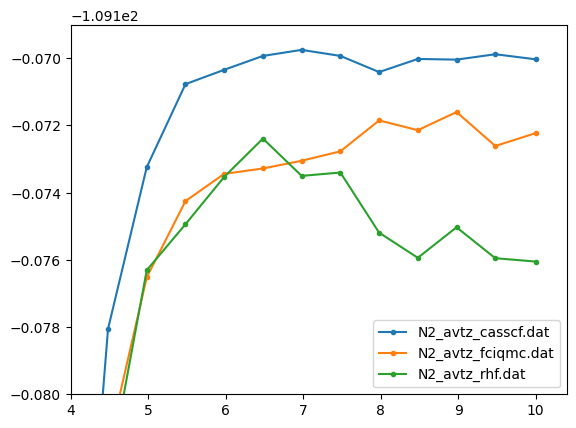

In [37]:
for data_name in data_all:
    data = load_data_with_uncertainties(data_name, [1])
    plt.plot(data[:,0], data[:,1], '.-', label=data_name)
    # plt.plot(data[:,0], data[:,-1], '.-', label=data_name+"_dcsd")
# for data_name in data_f12_all:
#     data = np.genfromtxt(data_name)
#     plt.plot(data[:,0], data[:,3], '.-', label=data_name)
plt.legend()
# plt.plot(data_exp[:,0], data_exp[:,1], 'k-', label='Experiment')
plt.savefig("binding_curves_rhf_zoom.pdf")
plt.xlim(left=4)
plt.ylim(bottom=-109.18, top=-109.169)

# plt.xlim(left=1.8,right=2.5)
# plt.ylim(top=-109.5)
# plt.close()

In [9]:
data_exp = np.genfromtxt('experiment.dat')

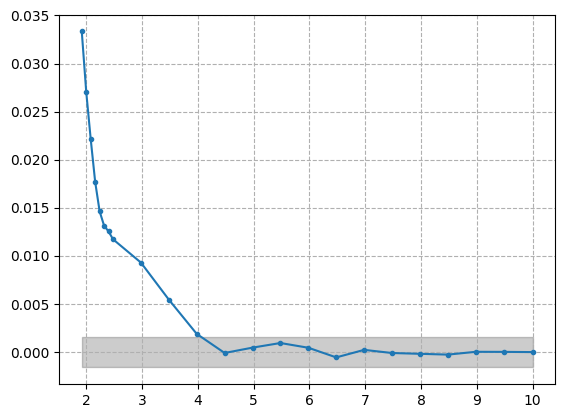

In [16]:
residuals = (data[:,1]-data[-1,1]) - (data_exp[:,1]-data_exp[-1,1])
plt.plot(data_exp[:,0], residuals, '.-')
# plt.errorbar(data_exp[:,0], residuals, yerr=data[:,2])
plt.grid(True, which="both", ls="--")
plt.fill_between([min(data_exp[:,0]), max(data_exp[:,0])], -0.0016, +0.0016, alpha=0.2, color='k')